## Load the Packages 

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys

In [3]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
import os

In [8]:
path='C:/Users/.../Desktop'
os.chdir(path)

In [12]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(df))
df.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Basic Exploration & Pre-processing

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [24]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

(array([1.654e+03, 5.540e+02, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1730. ,  68223.6, 134717.2, 201210.8, 267704.4, 334198. ,
        400691.6, 467185.2, 533678.8, 600172.4, 666666. ]),
 <BarContainer object of 10 artists>)

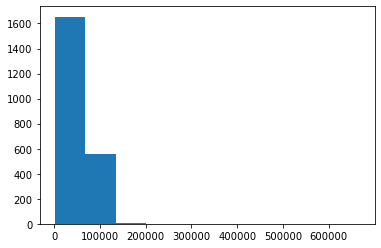

In [19]:
plt.hist(df['Income'])

In [23]:
df['Income']=df['Income'].fillna(df['Income'].median())

In [27]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Z_CostContact and Z_Revenue contain a single value, which are zero-variance predictors that may not contain useful information for modelling. So, I decide to drop them.

In [28]:
df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [239]:
df.describe()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Days_enrolled,Age,Living_status,Children,Parent,Family_size,Spent,Clusters,Clusters_K,Total_Promos
count,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,...,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000
mean,0.623357,49263.832912,0.482305,0.528817,49.300303,272.295753,19.774014,132.138018,28.659252,20.414055,...,505.627907,53.044995,1.650152,1.011122,0.762386,2.661274,510.604146,0.890293,1.952477,0.254297
std,0.680831,19503.393831,0.545307,0.543903,28.988212,319.535688,29.661315,180.895109,41.978523,30.694490,...,230.636758,11.609281,0.477042,0.732149,0.425729,0.884033,539.466639,0.959787,0.872074,0.609771
min,0.000000,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,26.000000,1.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,34125.750000,0.000000,0.000000,24.000000,20.000000,1.000000,14.000000,2.000000,1.000000,...,337.000000,45.000000,1.000000,1.000000,1.000000,2.000000,62.000000,0.000000,1.000000,0.000000
50%,1.000000,48606.000000,0.000000,1.000000,50.000000,135.000000,7.000000,51.000000,10.000000,7.000000,...,505.500000,52.000000,2.000000,1.000000,1.000000,3.000000,275.000000,1.000000,2.000000,0.000000
75%,1.000000,64719.750000,1.000000,1.000000,74.000000,445.000000,25.000000,169.000000,36.000000,26.000000,...,674.000000,62.000000,2.000000,1.000000,1.000000,3.000000,899.750000,1.000000,3.000000,0.000000
max,2.000000,101970.000000,2.000000,2.000000,99.000000,1311.000000,143.000000,843.000000,201.000000,150.000000,...,1063.000000,82.000000,2.000000,3.000000,1.000000,5.000000,2349.000000,3.000000,3.000000,4.000000


From the statistical summary above, it can be seem that there are outlier in our data. So, I decide to run a outlier check and remove the outlier.

In [31]:
#filter out the non-numerical features
num=[col for col in df.columns
    if type(col) !='object']
num

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response']

In [32]:
#filter out categorical features, such as 
num_col=['Year_Birth',
 'Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [34]:
# Z score
from scipy import stats
z = np.abs(stats.zscore(df[num_col]))
print(z)

      Year_Birth    Income   Recency  MntWines  MntFruits  MntMeatProducts  \
0       0.985345  0.235696  0.307039  0.983781   1.551577         1.679702   
1       1.235733  0.235454  0.383664  0.870479   0.636301         0.713225   
2       0.317643  0.773999  0.798086  0.362723   0.570804         0.177032   
3       1.268149  1.022355  0.798086  0.870479   0.560857         0.651187   
4       1.017761  0.241888  1.550305  0.389085   0.419916         0.216914   
...          ...       ...       ...       ...        ...              ...   
2235    0.150717  0.358936  0.107383  1.203678   0.419916         0.066692   
2236    1.903435  0.470432  0.237969  0.303291   0.661449         0.606873   
2237    1.017761  0.189476  1.446700  1.795020   0.545656         0.221789   
2238    1.068807  0.679401  1.419719  0.368666   0.092992         0.208495   
2239    1.235733  0.025208  0.314594  0.653555   0.586005         0.469501   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDeals

In [35]:
threshold = 3
 
# Position of the outlier
print(np.where(z > 3))

(array([   9,   12,   21,   21,   21,   27,   27,   27,   40,   45,   45,
         49,   51,   53,   76,   90,   98,  102,  109,  111,  126,  126,
        140,  161,  164,  164,  164,  164,  168,  179,  192,  197,  198,
        201,  203,  213,  214,  230,  239,  240,  243,  243,  249,  252,
        252,  266,  266,  276,  287,  288,  292,  292,  305,  305,  336,
        339,  339,  345,  347,  347,  360,  360,  360,  368,  392,  404,
        419,  429,  432,  447,  447,  456,  456,  459,  461,  463,  463,
        470,  492,  497,  506,  523,  528,  528,  537,  543,  546,  557,
        559,  561,  561,  586,  591,  591,  617,  626,  634,  646,  646,
        646,  655,  672,  687,  687,  687,  687,  702,  715,  723,  723,
        723,  753,  764,  766,  766,  771,  774,  779,  780,  790,  803,
        809,  812,  814,  817,  824,  825,  845,  846,  852,  852,  855,
        855,  875,  895,  897,  905,  906,  914,  914,  917,  921,  924,
        926,  928,  934,  966,  981,  984,  984,  

In [37]:
# As 99.7% of the data points lie between +/- 3 standard deviation
#(using Gaussian Distribution approach).
outlier=np.where(z > 3)
df.drop(outlier[0], inplace = True)

In [47]:
df.shape

(1978, 27)

In [49]:
df['Marital_Status'].value_counts()

Married     766
Together    520
Single      416
Divorced    207
Widow        63
Alone         3
YOLO          2
Absurd        1
Name: Marital_Status, dtype: int64

In [82]:
df['Education'].value_counts()

Graduation    971
PhD           444
Master        337
2n Cycle      173
Basic          53
Name: Education, dtype: int64

In [51]:
df['Dt_Customer'].value_counts()

31-08-2012    12
12-09-2012    10
20-08-2013    10
12-05-2014    10
02-01-2013     9
              ..
09-11-2013     1
13-08-2013     1
03-01-2013     1
04-11-2012     1
09-01-2014     1
Name: Dt_Customer, Length: 648, dtype: int64

In [77]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

In [56]:
df['Dt_Customer'].sort_values(ascending=True)

976    2012-01-08
2194   2012-01-08
2029   2012-01-08
724    2012-01-08
1473   2012-01-09
          ...    
153    2014-12-05
50     2014-12-05
88     2014-12-05
1034   2014-12-05
2003   2014-12-06
Name: Dt_Customer, Length: 1978, dtype: datetime64[ns]

The newest customer's enrollment date in therecords: 2014-12-06
The oldest customer's enrollment date in the records: 2012-01-08

From data exploration, we see that data cleaning process is needed for serveral columns, such as education, year of birth, and number of chidren etc.

Before tuning these categorical features into numerical values, we start with re-processing the features to abstract more information from the given dataset.

- Calculate the enrollment date of each customer based on the enrollment date

- Calculate the age of each customer based on their birth year


In [78]:
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i) 

In [79]:
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df['Days_enrolled']=days

In [80]:
df['Days_enrolled']=pd.to_numeric(df['Days_enrolled'].dt.days, downcast='integer')

In [ ]:
# Age of customer
df['Age']=2022-df['Year_Birth']


- Combine labels that have similar meaning for catergorical data

- Add new features from given data to adstract more information for each customer's profile, such as family size and number of the children

In [108]:
group={'Married':'Couple','Together':'Couple','Absurd':'Single','Widow':'Single',
      'YOLO':'Single','Divorced':'Single','Alone':'Single'}
df['Living_status']=df['Marital_Status'].replace(group)

In [104]:
df['Children']=df['Kidhome']+df['Teenhome']

In [89]:
# segment education levels
edu={'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Graduate',
    'Master':'Postgraduate','PhD':'Postgraduate'}
df['Education']=df['Education'].replace(edu)

In [96]:
# Find parenthood and familiy size
df['Parent']=np.where(df.Children>0,1,0)


In [123]:
df['Living_status']=df['Living_status'].replace({'Single':1,'Couple':2})

In [124]:
df['Family_size']=df['Living_status']+df['Children']

In [112]:
df['Children'].value_counts()

1    1065
0     470
2     394
3      49
Name: Children, dtype: int64

In [125]:
df

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_enrolled,Age,Living_status,Children,Parent,Family_size
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,971,65,1,0,0,1
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,125,68,1,2,1,3
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,472,57,2,0,0,2
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,65,38,2,1,1,3
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,321,41,2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,Graduate,34421.0,1,0,81,3,3,7,6,2,...,0,0,0,0,698,48,2,1,1,3
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,1,0,0,0,61,76,2,3,1,5
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,0,315,41,1,0,0,1
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,0,316,66,2,1,1,3


In [115]:
# rename the unclear title of some columns
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [117]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [127]:
#Total spendings on various items
df["Spent"] = df["Wines"]+ df["Fruits"]+ df["Meat"]+ df["Fish"]+df["Sweets"]+ df["Gold"]

In [128]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp2,Complain,Response,Days_enrolled,Age,Living_status,Children,Parent,Family_size,Spent
count,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,...,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000
mean,49263.832912,0.482305,0.528817,49.300303,272.295753,19.774014,132.138018,28.659252,20.414055,37.323054,...,0.011628,0.010111,0.132963,505.627907,53.044995,1.650152,1.011122,0.762386,2.661274,510.604146
std,19503.393831,0.545307,0.543903,28.988212,319.535688,29.661315,180.895109,41.978523,30.694490,43.178311,...,0.107231,0.100070,0.339620,230.636758,11.609281,0.477042,0.732149,0.425729,0.884033,539.466639
min,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,26.000000,1.000000,0.000000,0.000000,1.000000,8.000000
25%,34125.750000,0.000000,0.000000,24.000000,20.000000,1.000000,14.000000,2.000000,1.000000,8.000000,...,0.000000,0.000000,0.000000,337.000000,45.000000,1.000000,1.000000,1.000000,2.000000,62.000000
50%,48606.000000,0.000000,1.000000,50.000000,135.000000,7.000000,51.000000,10.000000,7.000000,20.000000,...,0.000000,0.000000,0.000000,505.500000,52.000000,2.000000,1.000000,1.000000,3.000000,275.000000
75%,64719.750000,1.000000,1.000000,74.000000,445.000000,25.000000,169.000000,36.000000,26.000000,47.750000,...,0.000000,0.000000,0.000000,674.000000,62.000000,2.000000,1.000000,1.000000,3.000000,899.750000
max,101970.000000,2.000000,2.000000,99.000000,1311.000000,143.000000,843.000000,201.000000,150.000000,200.000000,...,1.000000,1.000000,1.000000,1063.000000,82.000000,2.000000,3.000000,1.000000,5.000000,2349.000000


In [129]:
df.select_dtypes(include=['object']).columns.tolist()

['Education']

In [132]:
LE=LabelEncoder()
df['Education']=LE.fit_transform(df['Education'])

## Dememtionalilty Reduction

In [171]:
#drop column with boolean value and then conduct dementinality reduction 

df1=df.copy()
col=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
     'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df1=df1.drop(col,axis=1)

In [172]:
#Scalling the data
scaler=StandardScaler()
scaler.fit(df1)
scaled_df=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)

In [173]:
scaled_df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_enrolled,Age,Living_status,Children,Parent,Family_size,Spent
0,-0.915814,0.455121,-0.884689,-0.972509,0.300187,1.135385,2.300749,2.288435,3.415484,2.202449,...,2.986959,-0.497731,0.684927,2.018281,1.030040,-1.363225,-1.381383,-1.791232,-1.879674,2.051426
1,-0.915814,-0.149747,0.949603,0.866518,-0.389923,-0.817943,-0.633106,-0.697476,-0.635229,-0.632653,...,-0.504429,-1.127617,-0.225547,-1.650752,1.288520,-1.363225,1.350992,0.558275,0.383257,-0.896675
2,-0.915814,1.146201,-0.884689,-0.972509,-0.803989,0.481145,0.985572,-0.028410,1.961993,0.019094,...,-0.116497,1.391927,-0.680784,-0.145841,0.340762,0.733555,-1.381383,-1.791232,-0.748209,0.492084
3,-0.915814,-1.159980,0.949603,-0.972509,-0.803989,-0.817943,-0.531939,-0.620063,-0.444608,-0.567478,...,-0.892361,-0.497731,0.229690,-1.910967,-1.296273,0.733555,-0.015195,0.558275,0.383257,-0.848467
4,0.553351,0.463071,0.949603,-0.972509,1.542386,-0.310829,0.783238,-0.078176,0.413191,0.214619,...,0.271435,0.132155,-0.225547,-0.800716,-1.037794,0.733555,-0.015195,0.558275,0.383257,-0.164286


In [174]:
scaled_df.index

RangeIndex(start=0, stop=1978, step=1)

In [139]:
pcs = PCA()
pcs.fit(scaled_df)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                              'Proportion of variance': pcs.explained_variance_ratio_,
                              'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,2.9069,1.7581,1.2612,1.1612,1.0499,1.0080,0.9800,0.9115,0.8343,0.7907,...,0.6055,0.5905,0.5269,0.5183,0.4607,0.4504,0.3609,0.0,0.0,0.0
Proportion of variance,0.3672,0.1343,0.0691,0.0586,0.0479,0.0442,0.0417,0.0361,0.0302,0.0272,...,0.0159,0.0152,0.0121,0.0117,0.0092,0.0088,0.0057,0.0,0.0,0.0
Cumulative proportion,0.3672,0.5015,0.5707,0.6293,0.6772,0.7213,0.7630,0.7992,0.8294,0.8566,...,0.9374,0.9526,0.9646,0.9763,0.9855,0.9943,1.0000,1.0,1.0,1.0


From the table above, we can see that we need at least 9 principle components to retian 82.94% of the variance.

In [152]:
#Initiating PCA to reduce dimentions aka features to 9
pca = PCA(n_components=9)
pca.fit(scaled_df)
PCA_ds = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3",
                                                          "col4","col5", "col6",
                                                         "col7","col8", "col9"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1978.0,-3.233005e-17,2.906940,-4.467634,-2.476890,-0.870395,2.173599,8.731111
col2,1978.0,-6.836459e-17,1.758093,-4.498551,-1.387413,-0.139354,1.314739,6.593525
col3,1978.0,1.762437e-17,1.261216,-3.548848,-0.862259,-0.026085,0.861443,3.929655
col4,1978.0,-1.729461e-17,1.161223,-3.177987,-0.740935,-0.000320,0.900834,3.575519
col5,1978.0,3.513648e-17,1.049903,-2.954964,-0.751801,-0.001258,0.691351,3.156661
col6,1978.0,4.354875e-17,1.007952,-2.517285,-0.792078,-0.014530,0.778503,2.838295
col7,1978.0,-5.802290e-18,0.979997,-2.834494,-0.652556,0.063418,0.703833,2.918989
col8,1978.0,6.825234e-17,0.911502,-3.262633,-0.597290,0.006413,0.634310,3.735206
col9,1978.0,-3.850420e-17,0.834290,-3.042965,-0.532622,-0.010268,0.522707,3.159278


## Comparision of Diffrent Cluster Models

## 1. Decide the number of clusters

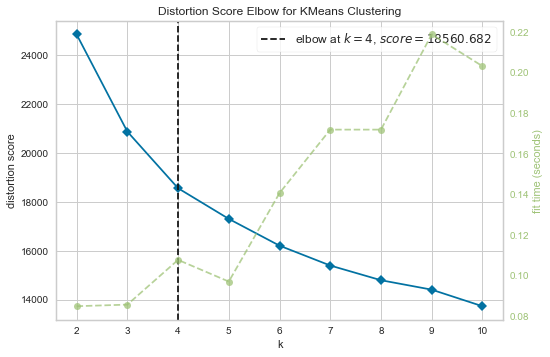

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [155]:
#Elbow Method to determine the number of clusters to be formed
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

## 2.1 K Mean Clustering

In [160]:
def clusterSizes(kmeans):
    return pd.Series(kmeans.labels_).value_counts().sort_index()


In [162]:
clusters = KMeans(n_clusters=4, random_state=1).fit(PCA_ds)
print(clusterSizes(clusters))


0    519
1    590
2    361
3    508
dtype: int64


In [180]:
yhat_K = clusters.fit_predict(PCA_ds)
PCA_ds["Clusters_K"] = yhat_K
#Adding the Clusters feature to the orignal dataframe.
df["Clusters_K"]= yhat_K

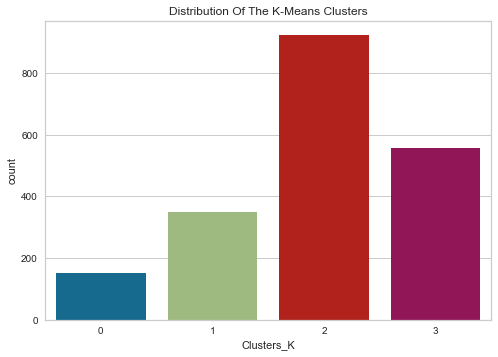

In [181]:
pl = sns.countplot(x=df["Clusters_K"])
pl.set_title("Distribution Of The K-Means Clusters")
plt.show()

With K-mean model, most of the customers are categorized to cluster 3.



## 2.2 Hierarchical Clustering

In [163]:
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

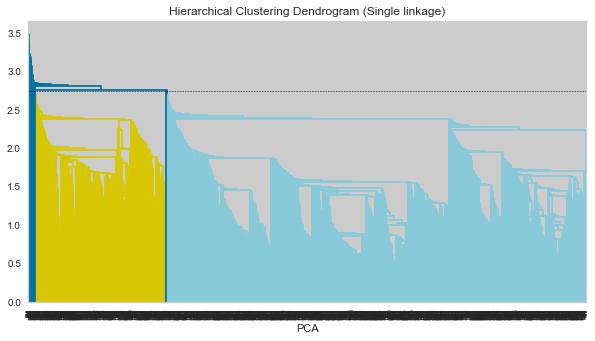

In [175]:
Z = linkage(PCA_ds, method='single')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('PCA')
dendrogram(Z, labels=PCA_ds.index, color_threshold=2.75)
plt.axhline(y=2.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

Hierarchical clustering can't handle big data well but K Means clustering can. 



## 2.3 Agglomerative Clustering

In [177]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

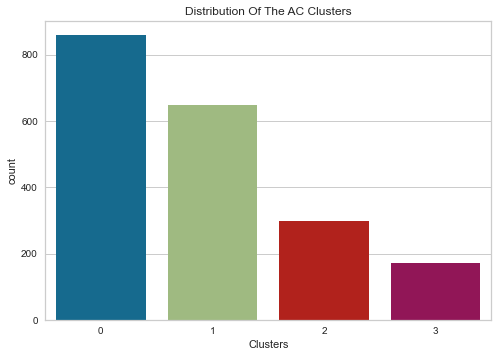

In [182]:
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The AC Clusters")
plt.show()

In [195]:
X=PCA_ds.iloc[:,0:9].copy()

## 2.4 DBSCAN

In [190]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [207]:
dbscan_cluster = DBSCAN(eps=0.1, min_samples=10)
dbscan_cluster.fit(X)

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

Estimated no. of clusters: 0


The basic DBscan model with epsilon of 0.1 did not work well, so I decide to tune the model with elbow point detection method to arrive at a suitable value of epsilon.

Text(0, 0.5, 'Distance')

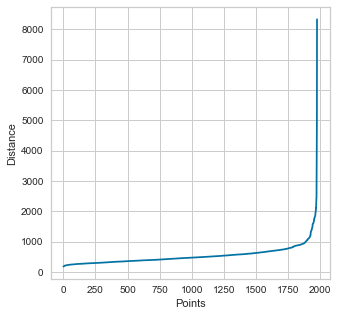

In [202]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(df)

distances, indices = neighbors.kneighbors(df)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

792.9199202946032


<Figure size 360x360 with 0 Axes>

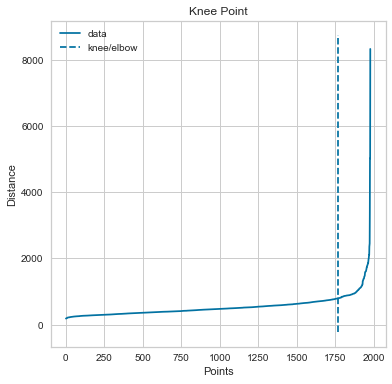

In [203]:
!pip install --upgrade kneed
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [205]:
# fit the model with best epsilon value of 792.91
dbscan_cluster = DBSCAN(eps=792.91, min_samples=10)
dbscan_cluster.fit(X)

DBSCAN(eps=792.91, min_samples=10)

In [206]:
# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

Estimated no. of clusters: 1


In [209]:
#fit with original data without PCA
dbscan_cluster = DBSCAN(eps=792.91, min_samples=10)
dbscan_cluster.fit(scaled_df)

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

Estimated no. of clusters: 1


DBscan model failled to cluster the dataset.

Only K-mean Clustering and  Agglomerative Clustering models successfully segment the customers, so I decide to use the result of Agglomerative Clustering for further analysis.

## Profile of Customer

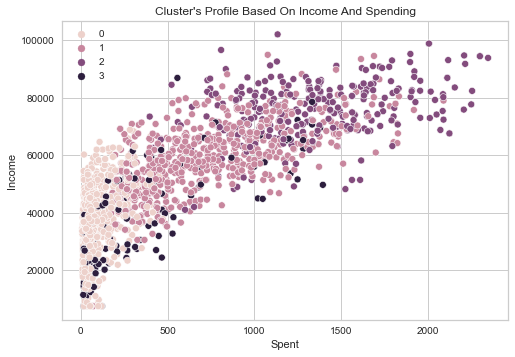

In [208]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Group 0: Low income and low spending

Group 1: Average income and high spending 

Group 2: High income and high spending

Group 3: Average  income and average spending

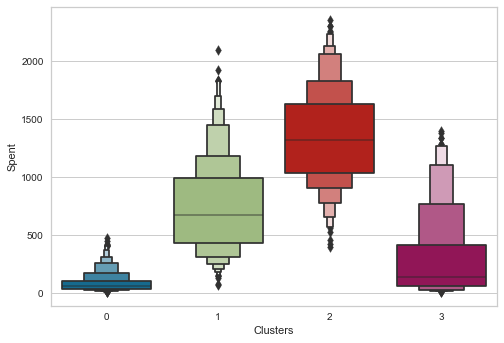

In [211]:
plt.figure()

pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"])
plt.show()

From the above plot, it can be clearly seen that cluster 2, representing customers who are in the high income and high spending group, is our biggest set of customers and followed by cluster 1 which represents customers with average income and high spending.

In [212]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

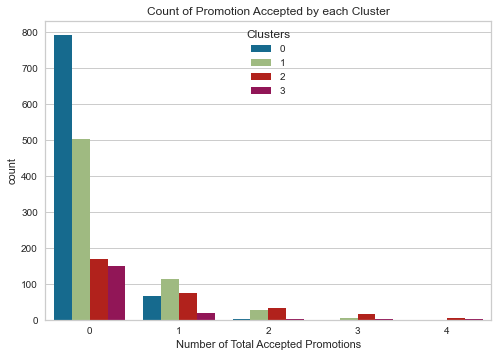

In [217]:
#plot the count of total compagin accepted by each cluster
plt.figure()
pl=sns.countplot(x=df['Total_Promos'],hue=df['Clusters'])
pl.set_title("Count of Promotion Accepted by each Cluster")
pl.set_xlabel("Number of Total Accepted Promotions")
plt.show()

There has not been an overwhelming response to the campaigns so far. Very few participants overall.Only high spending customers of cluster 1 and 2 have accepted more than 2 compaign offers. Perhaps better-targeted and well-planned campaigns are required to boost sales.

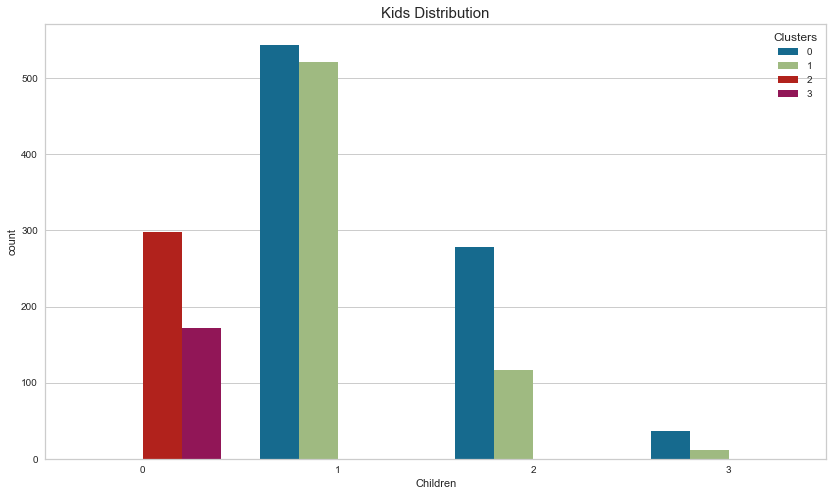

In [220]:
plt.figure(figsize = (14,8) )
sns.countplot(data =df, x = 'Children' , hue = 'Clusters')
plt.title('Kids Distribution' ,fontsize = 15)
plt.show()

- Customers from cluster 2 and 3 have no child

- Customer from cluster 0 and 1 have children with majority of them having one child



In [224]:
dico = dict(zip(LE.classes_, LE.transform(LE.classes_)))

In [225]:
dico

{'Graduate': 0, 'Postgraduate': 1, 'Undergraduate': 2}

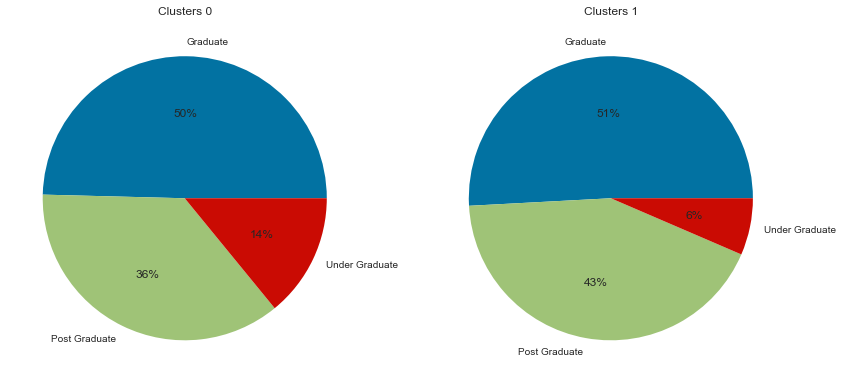

In [243]:
plt.figure(figsize = (14,8) )
education =['Graduate', 'Post Graduate', 'Under Graduate']
for i in range(2):
    counts =[]
    d = df[df['Clusters'] == i]
    counts.append(len(d[d['Education'] == 0]))
    counts.append(len(d[d['Education'] == 1]))    
    counts.append(len(d[d['Education'] == 2]))    
    plt.subplot(1,2,i+1)
    plt.title("Clusters "+str(i))
    plt.pie(counts, labels = education, autopct='%.0f%%')
plt.show()

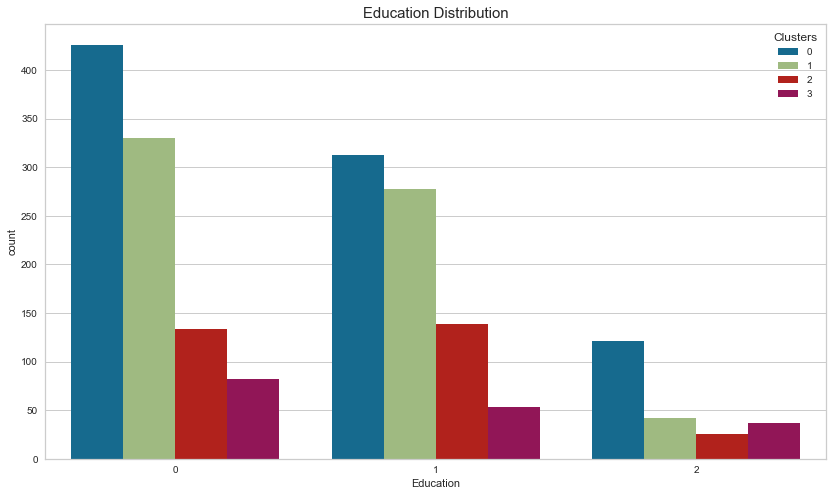

In [240]:
plt.figure(figsize = (14,8) )
sns.countplot(data =df, x = 'Education' , hue = 'Clusters')
plt.title('Education Distribution' ,fontsize = 15)
plt.show()

- Graduate: 0

- Postgraduate: 1

- Undergraduate: 2

- Most of the customers have higher education


The high spending customers come from cluster 1 and 2, and their profile contains characters:

- Most of them have higher education

- Most of them have zero to 1 child

- They have high spending and average to high income level

- Few of them have accepcted more than 2 campign offers

The average and low spending customer come from cluster 0 and 3, and their profile contains characters:

- They have low to average income level and spending 

- Most of them are undergraduate and graduate

- None of them has accepted more than 2 compaign offers

- Customers of cluster 3 have no child

- Majority of customers of cluster 0 have 1 to 2 children